In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57344/57026 [==============================] - 1s 11us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
train_targets[0]

15.2

In [8]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [10]:
from keras import models
from keras import layers

In [11]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
k=4
num_val_sample=len(train_data)//k
num_epochs=100
all_scores=[]

In [15]:
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_sample: (i+1)*num_val_sample]
    val_targets=train_targets[i*num_val_sample: (i+1)*num_val_sample]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_sample],
                                       train_data[(i+1)*num_val_sample:]],
                                      axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_sample],
                                       train_targets[(i+1)*num_val_sample:]],
                                      axis=0)
    model=build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
print(all_scores)

[2.117207647550224, 2.2551488168168774, 2.8941216881912535, 2.34756601801013]


In [17]:
print(np.mean(all_scores))

2.403511042642121


In [19]:
num_epochs=500
all_mae_histories=[]
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_sample: (i+1)*num_val_sample]
    val_targets=train_targets[i*num_val_sample: (i+1)*num_val_sample]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_sample],
                                       train_data[(i+1)*num_val_sample:]],
                                      axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_sample],
                                       train_targets[(i+1)*num_val_sample:]],
                                      axis=0)
    model=build_model()
    history=model.fit(partial_train_data,partial_train_targets,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs,
                      batch_size=1,
                      verbose=0)
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

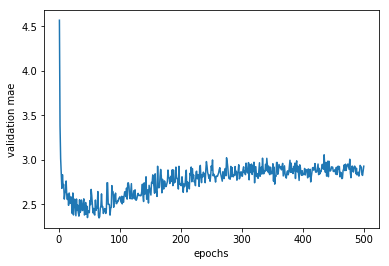

In [21]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [22]:
def smooth_curve(points,factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points        

In [23]:
smooth_mae_history=smooth_curve(average_mae_history[10:])

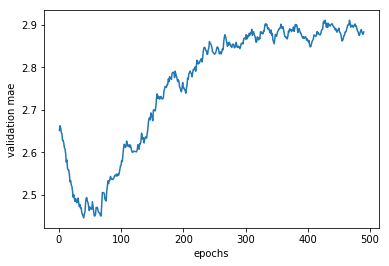

In [24]:
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [25]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 2ms/step


In [26]:
print(test_mae_score)

2.88971591463276
